## Default of Credit Card Clients Dataset - case

### 1. Require libraries and reading file

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install imblearn
!pip install mlxtend
!pip install feature_engine
!pip install shap
!pip install scikit-learn==1.2.2
#!pip install pandas-profiling 
#--ignore-installed llvmlite
#!pip install ydata-profiling

In [3]:
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #data visualization
import numpy as np #computation/numeric functions
import seaborn as sns #Matplotlib-based data visualization that simplifies the creation of statistical graphs
#from pandas_profiling import ProfileReport #automatically generates detailed "profile" reports from the data
#from ydata_profiling import ProfileReport #automatically generates detailed "profile" reports from the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler #library to perform data normalization
from feature_engine.selection import DropCorrelatedFeatures #library to select variables with high correlation
# #Jupyter plugin that allows interactive visualization of data tables:
# !pip install jupyter-datatables
# from jupyter_datatables import init_datatables_mode
from sklearn.feature_selection import SequentialFeatureSelector #variables selection
from sklearn.linear_model import LogisticRegression #fit logistic regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve #roc_curve
import shap #graph sharp

In [4]:
df = pd.read_csv(r"C:\Users\LUANATHAMIRISDASILVA\Downloads\case\UCI_Credit_Card.csv", delimiter=',')
df.shape

(30000, 25)

### 2. Dataprep

In the Dataprep stage, we will pass a filter on the database before modeling. At this stage, we will check the type of variables in the database, the volume by harvest (when applicable), as well as carry out descriptive statistics to check the behavior of the variables, whether there will be a need for any adjustments to correct missing data, the possibility of creating new features based on existing ones and finally, a correlation analysis in order to identify and filter variables that may have multicollinearity in the model.

**Identifying database variables:**   

**ID**: Customer identifier   
**LIMIT_BAL**: Value of credit granted in dollars   
**SEX**: Gender (1=male, 2=female)   
**EDUCATION**: (1=postgraduate, 2=university, 3=high school, 4=other, 5=unknown, 6=unknown)   
**MARRIAGE**: Marital status (1=married, 2=single, 3=other)   
**AGE**: Age in years   
**PAY_0**: Payment status in September 2005 (-1=payment due, 1=payment late for one month, 2=payment late for two months,… 8=payment late for eight months, 9= late payment for nine months or more)   
**PAY_2**: Payment status in August 2005 (same scale as above)   
**PAY_3**: Payment status in July 2005 (scale same as above)   
**PAY_4**: Payment status in June 2005 (same scale as above)   
**PAY_5**: Payment status in May 2005 (same scale as above)   
**PAY_6**: Payment status in April 2005 (same scale as above)   
**BILL_AMT1**: Value of the account statement in September 2005 (NT dollars)   
**BILL_AMT2**: Amount of the account statement in August 2005 (NT dollars)   
**BILL_AMT3**: Value of the account statement in July 2005 (NT dollars)   
**BILL_AMT4**: Value of the account statement in June 2005 (NT dollars)   
**BILL_AMT5**: Value of the account statement in May 2005 (NT dollars)   
**BILL_AMT6**: Value of the account statement in April 2005 (NT dollars)   
**PAY_AMT1**: Amount of the previous payment in September 2005 (NT dollars)   
**PAY_AMT2**: Amount of the previous payment in August 2005 (NT dollars)   
**PAY_AMT3**: Amount of the previous payment in July 2005 (NT dollars)   
**PAY_AMT4**: Amount of the previous payment in June 2005 (NT dollars)   
**PAY_AMT5**: Amount of the previous payment in May 2005 (NT dollars)   
**PAY_AMT6**: Amount of the previous payment in April 2005 (NT dollars)   
**default.payment.next.month**: Default payment (1=yes, 0=no) - TARGET

In [5]:
tipo_vars = df.dtypes
print(tipo_vars)

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


In [6]:
df = df.rename(columns={
    'PAY_0' : 'status_payment_sept',
    'PAY_2' : 'status_payment_aug',
    'PAY_3' : 'status_payment_july',
    'PAY_4' : 'status_payment_june',
    'PAY_5' : 'status_payment_may',
    'PAY_6' : 'status_payment_april',
    'BILL_AMT1': 'bill_sept',
    'BILL_AMT2' : 'bill_aug',
    'BILL_AMT3' : 'bill_july',
    'BILL_AMT4' : 'bill_june',
    'BILL_AMT5' : 'bill_may',
    'BILL_AMT6': 'bill_april',
    'PAY_AMT1' : 'previous_payment_sept',
    'PAY_AMT2' : 'previous_payment_aug',
    'PAY_AMT3' : 'previous_payment_july',
    'PAY_AMT4' : 'previous_payment_june',
    'PAY_AMT5' : 'previous_payment_may',
    'PAY_AMT6' : 'previous_payment_april',
    'default.payment.next.month' : 'target'
})

In [7]:
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE  status_payment_sept  status_payment_aug  \
count  30000.000000         30000.000000        30000.000000   
mean      35.485500            -0.016700           -0.133767   
std        9.217904             1.123802            1.197186   
min       21.0

A point of attention in the metadata of the variables is that in the education variable, we have 2 options for the answer "Unknown" and an option "Others". To avoid biasing our analysis in the future, we will combine these three categories into a single “Other” category.

In [8]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
#Recoding 5,6 and 4 into same category:
df["EDUCATION"].replace({0:4, 5:4, 6:4}, inplace = True)

In [10]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Note that in the marital status variable, although the metadata contains only 3 categories, in the descriptive table we have the minimum value is 0, that is, we have a category that is not included in the metadata, since the categories are: 1, 2 and 3.

In [11]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
df["MARRIAGE"].replace({0 : 3},inplace = True)
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [13]:
print(df.isnull().sum())

ID                        0
LIMIT_BAL                 0
SEX                       0
EDUCATION                 0
MARRIAGE                  0
AGE                       0
status_payment_sept       0
status_payment_aug        0
status_payment_july       0
status_payment_june       0
status_payment_may        0
status_payment_april      0
bill_sept                 0
bill_aug                  0
bill_july                 0
bill_june                 0
bill_may                  0
bill_april                0
previous_payment_sept     0
previous_payment_aug      0
previous_payment_july     0
previous_payment_june     0
previous_payment_may      0
previous_payment_april    0
target                    0
dtype: int64


In [14]:
df_adjust = df.copy()

In [15]:
df_adjust["status_payment_sept"]

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: status_payment_sept, Length: 30000, dtype: int64

In [16]:
status_payment_columns = df_adjust.columns[df_adjust.columns.str.startswith("status_payment")]
uniques_values = {}
for months in status_payment_columns:
    uniques_values[months] = df[months].nunique()
uniques_values

{'status_payment_sept': 11,
 'status_payment_aug': 11,
 'status_payment_july': 11,
 'status_payment_june': 11,
 'status_payment_may': 10,
 'status_payment_april': 10}

In [17]:
df_adjust.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,status_payment_sept,status_payment_aug,status_payment_july,status_payment_june,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Now, to check the database description in a faster and more dynamic way, we will perform ProfileReport:

In [18]:
from pandas_profiling import ProfileReport
profile  = ProfileReport(df_adjust)
# Generate the report
widgets = profile.to_widgets()
profile.to_file(output_file = 'output_complete_case.html')
# Complete html is available on Git:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

According to ProfileReport, we did not identify missing variables, which means that we will not need to treat cases that were missing up to a % that we considered appropriate. We could also have written a code to identify and handle these cases, but as we did not observe any point of attention in this database, we will not create the code.

However, we can see that the target is unbalanced, we have many more 0s than 1s and this point deserves attention and adjustment when developing the model.

<AxesSubplot:xlabel='target', ylabel='count'>

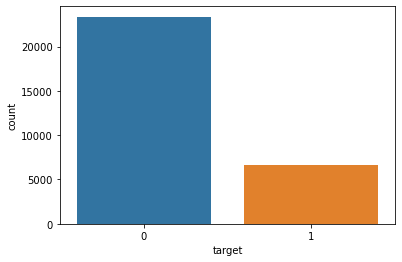

In [19]:
sns.countplot(
    data = df_adjust, x='target')

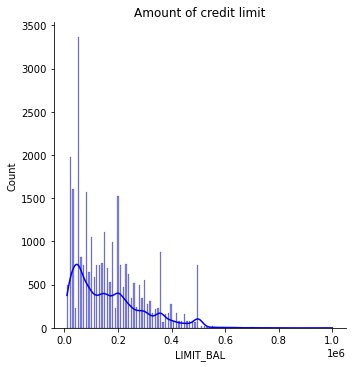

<Figure size 2016x864 with 0 Axes>

In [20]:
sns.displot(df_adjust["LIMIT_BAL"], kde=True, bins=200, color="blue")
plt.title("Amount of credit limit")
plt.figure(figsize=(28,12))
plt.show()

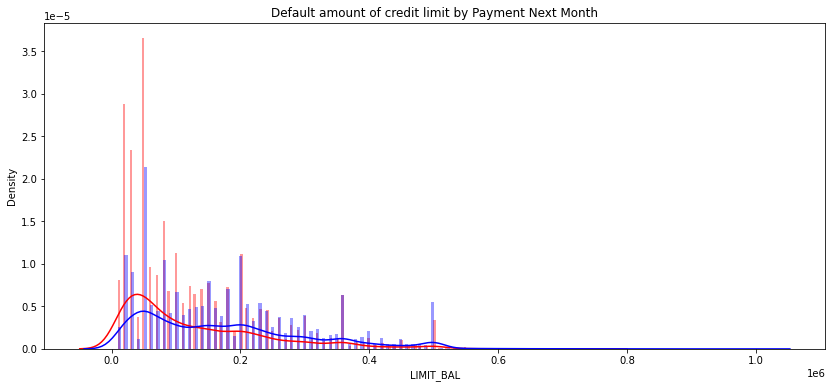

In [21]:
class_0 = df_adjust.loc[df_adjust["target"] == 0]["LIMIT_BAL"]
class_1 = df_adjust.loc[df_adjust["target"] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title("Default amount of credit limit by Payment Next Month")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="blue")
plt.show()

#### 2.1 Correlation

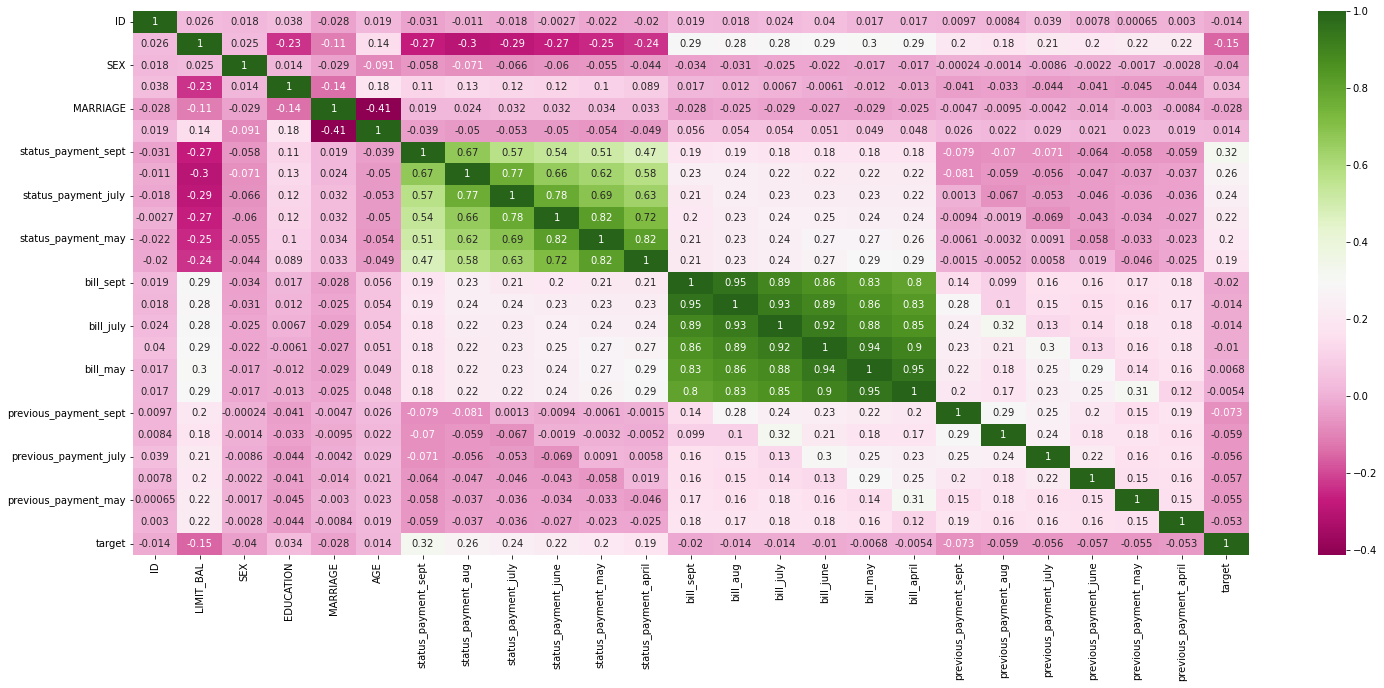

In [22]:
sns.heatmap(df_adjust.corr(), annot = True, cmap = 'PiYG')
plt.gcf().set_size_inches(25,10)

In [23]:
# Considerar apenas as variáveis numéricas para a análise de correlação
df_copy = df_adjust.copy()
df_copy = df_copy.fillna(0)
#Selecionando as variáveis
drop_corr_60 = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.0)
drop_corr_60.fit(df_copy)

print(f'Se considerarmos threshold de correlação de 0.6 deletaremos %d variáveis.' % (len(list(drop_corr_60.features_to_drop_))))


Se considerarmos threshold de correlação de 0.6 deletaremos 24 variáveis.


In [24]:
# Considerar apenas as variáveis numéricas para a análise de correlação
df_copy = df_adjust.copy()
df_copy = df_copy.fillna(0)
#Selecionando as variáveis
drop_corr_70 = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.70)
drop_corr_70.fit(df_copy)

print(f'Se considerarmos threshold de correlação de 0.7 deletaremos %d variáveis.' % (len(list(drop_corr_70.features_to_drop_))))


Se considerarmos threshold de correlação de 0.7 deletaremos 8 variáveis.


In [25]:
drop_corr_70.features_to_drop_

{'bill_april',
 'bill_aug',
 'bill_july',
 'bill_june',
 'bill_may',
 'status_payment_april',
 'status_payment_july',
 'status_payment_may'}

#### 2.3 Checking Outliers

<AxesSubplot:>

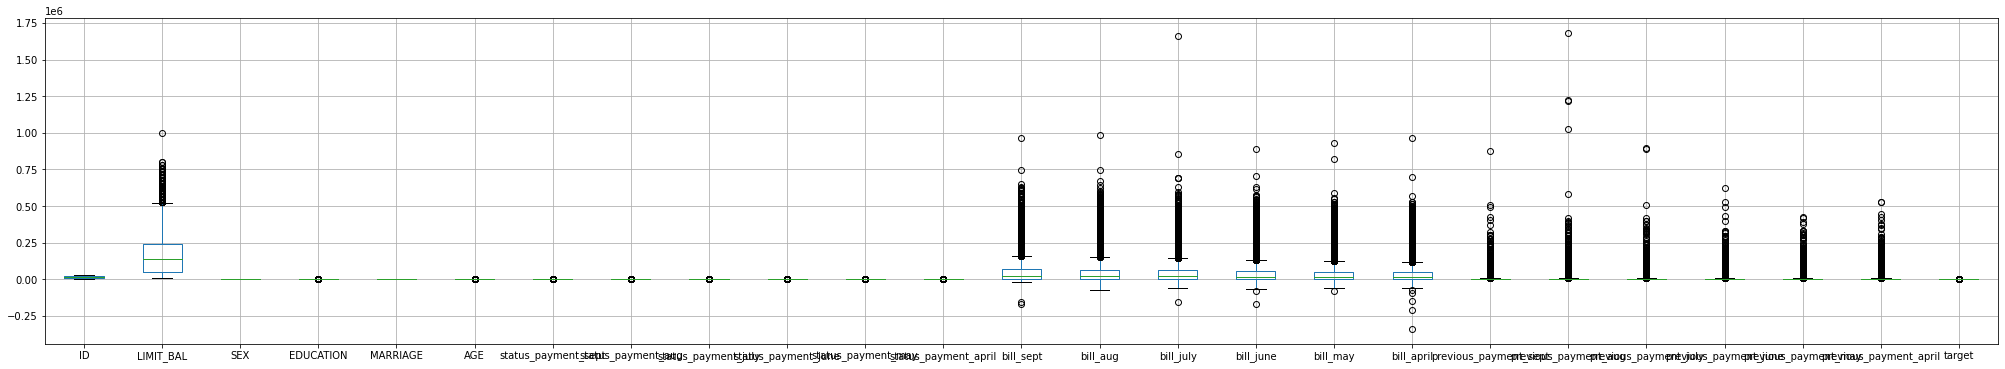

In [26]:
df_adjust.boxplot(figsize=(35,6))

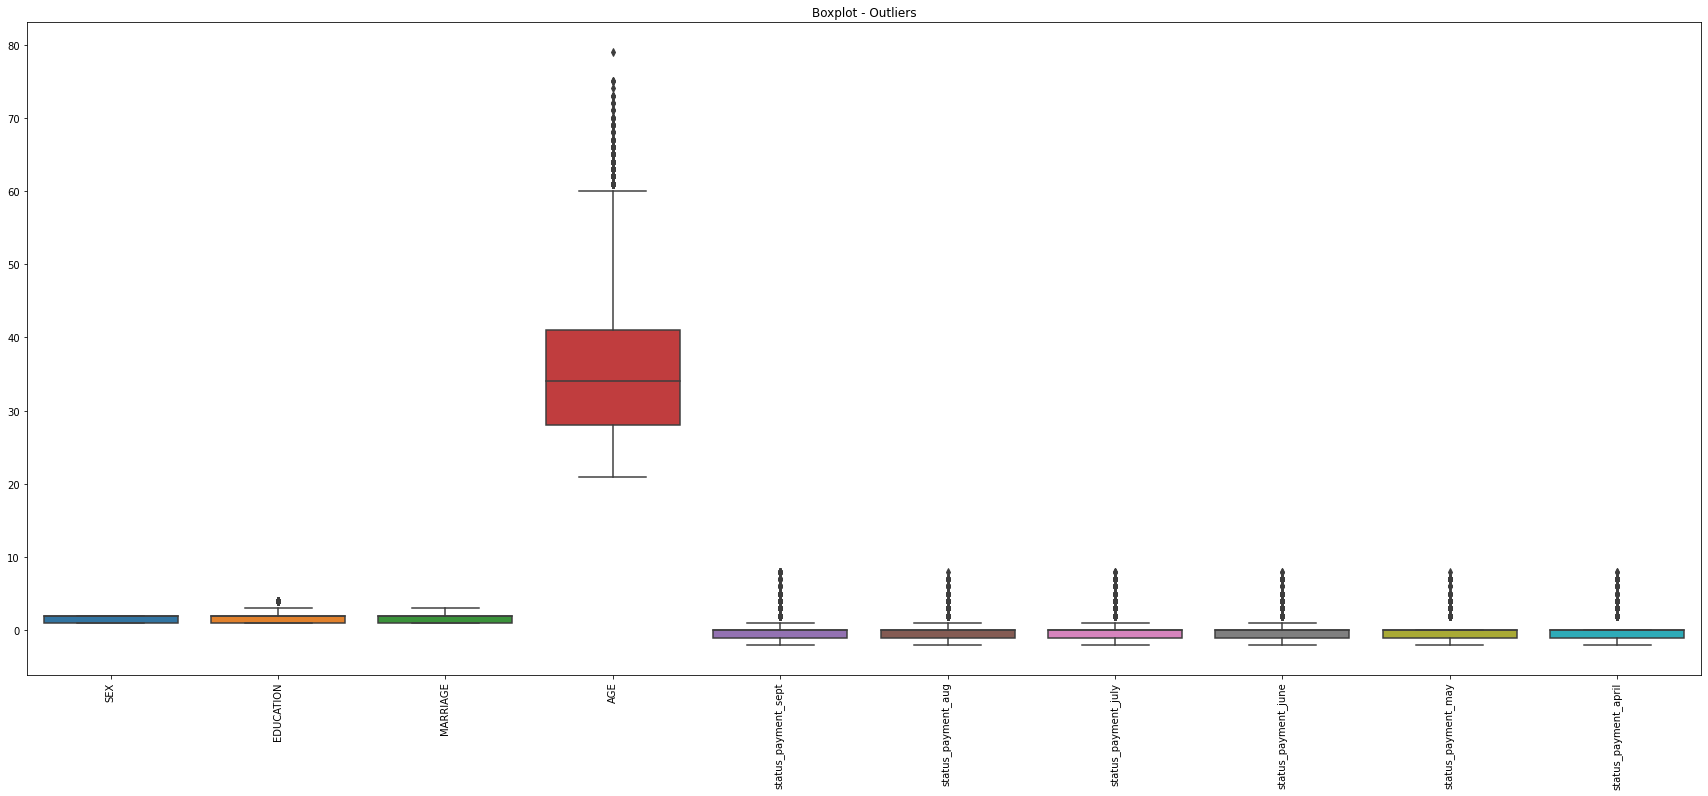

In [27]:
#boxplot para ajudar a ver outliers
plt.figure(figsize=(30,12))
variaveis = df_adjust.columns[2:12]
sns.boxplot(data = df_adjust[variaveis])
plt.xticks(rotation = 90)
plt.title('Boxplot - Outliers')
plt.show()

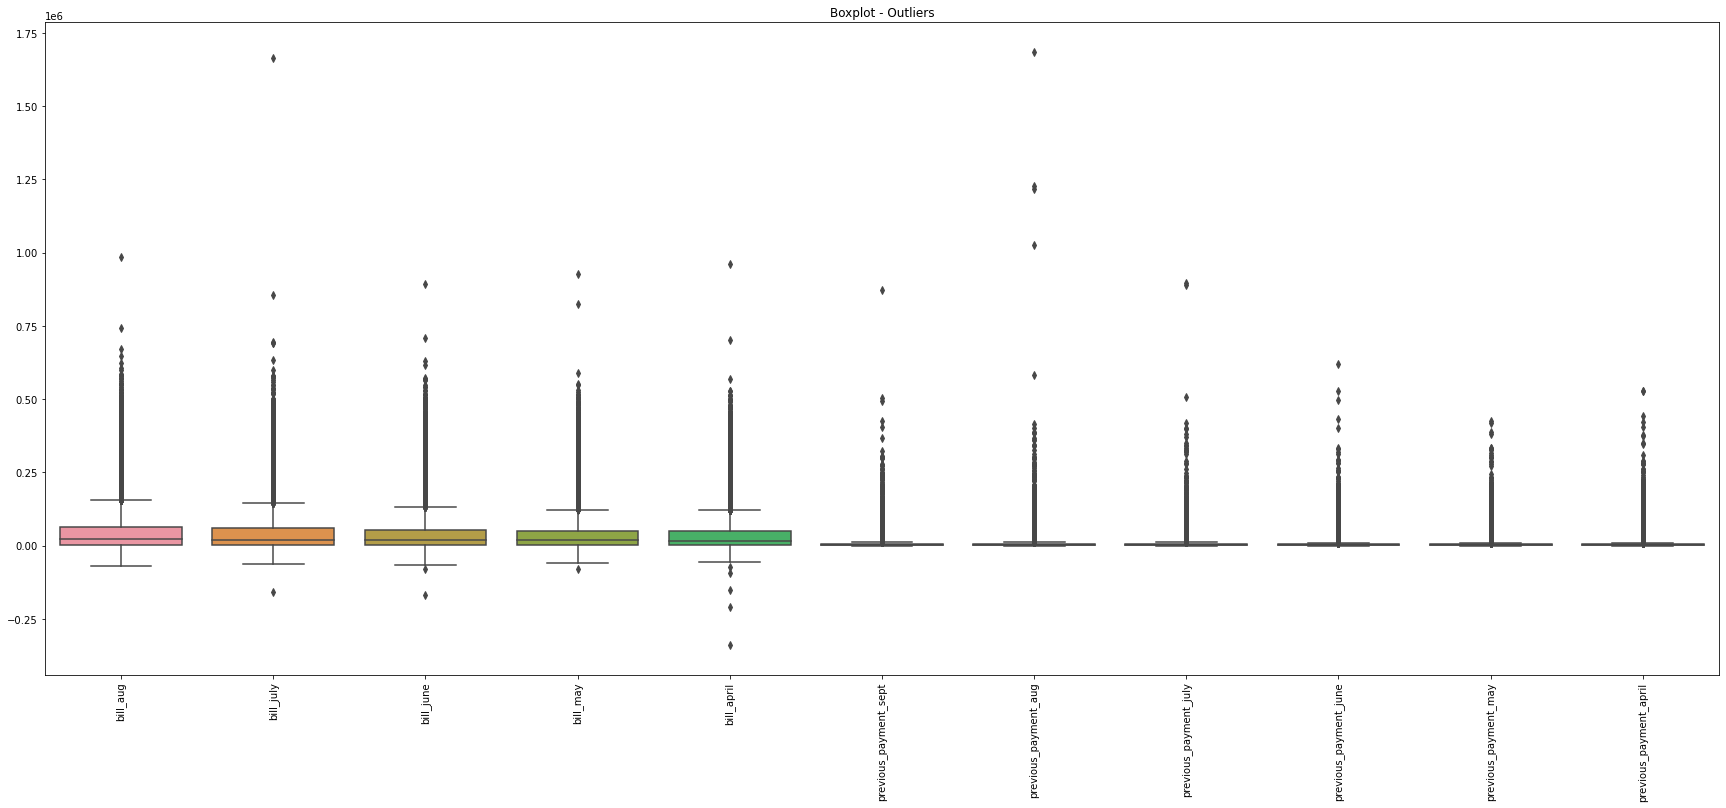

In [28]:
#boxplot para ajudar a ver outliers
plt.figure(figsize=(30,12))
variaveis = df_adjust.columns[13:24]
sns.boxplot(data = df_adjust[variaveis])
plt.xticks(rotation = 90)
plt.title('Boxplot - Outliers')
plt.show()

#### 2.3 Adjustment, normalization and dummies of variables

Since both bills and past payments are continuous resources, combining them into a single resource is expected to reduce dimensionality while retaining valuable information. This can lead to more simplified and interpretable models. Furthermore, we saw that this separate information, as expected, showed a correlation greater than 70%, therefore, combining them into a single variable can mean that in the variable selection stage, at least one of them remains in the model.

In [29]:
df_adjust

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,status_payment_sept,status_payment_aug,status_payment_july,status_payment_june,...,bill_june,bill_may,bill_april,previous_payment_sept,previous_payment_aug,previous_payment_july,previous_payment_june,previous_payment_may,previous_payment_april,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [30]:
df_adjust['bill_tot'] = df_adjust['bill_sept'] + df_adjust['bill_aug'] + df_adjust['bill_july'] + df_adjust['bill_june'] + df_adjust['bill_may'] + df_adjust['bill_april']

In [31]:
df_adjust['previous_payment_tot'] = df_adjust['previous_payment_sept'] + df_adjust['previous_payment_aug'] + df_adjust['previous_payment_july'] + df_adjust['previous_payment_june'] + df_adjust['previous_payment_may'] + df_adjust['previous_payment_april']

In [32]:
std = StandardScaler()
df_adjust['AGE_norm'] = std.fit_transform(df_adjust[['AGE']])
df_adjust['bill_sept_norm'] = std.fit_transform(df_adjust[['bill_sept']])
df_adjust['bill_aug_norm'] = std.fit_transform(df_adjust[['bill_aug']])
df_adjust['bill_july_norm'] = std.fit_transform(df_adjust[['bill_july']])
df_adjust['bill_june_norm'] = std.fit_transform(df_adjust[['bill_june']])
df_adjust['bill_may_norm'] = std.fit_transform(df_adjust[['bill_may']])
df_adjust['bill_april_norm'] = std.fit_transform(df_adjust[['bill_april']])
df_adjust['previous_payment_sept_norm'] = std.fit_transform(df_adjust[['previous_payment_sept']])
df_adjust['previous_payment_aug_norm'] = std.fit_transform(df_adjust[['previous_payment_aug']])
df_adjust['previous_payment_july_norm'] = std.fit_transform(df_adjust[['previous_payment_july']])
df_adjust['previous_paymebnt_june_norm'] = std.fit_transform(df_adjust[['previous_payment_june']])
df_adjust['previous_payment_may_norm'] = std.fit_transform(df_adjust[['previous_payment_may']])
df_adjust['previous_payment_april_norm'] = std.fit_transform(df_adjust[['previous_payment_april']])

df_adjust['bill_tot_norm'] = std.fit_transform(df_adjust[['bill_tot']])
df_adjust['previous_payment_tot_norm'] = std.fit_transform(df_adjust[['previous_payment_tot']])


In [33]:
df_adjust.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,status_payment_sept,status_payment_aug,status_payment_july,status_payment_june,...,bill_may_norm,bill_april_norm,previous_payment_sept_norm,previous_payment_aug_norm,previous_payment_july_norm,previous_paymebnt_june_norm,previous_payment_may_norm,previous_payment_april_norm,bill_tot_norm,previous_payment_tot_norm
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.690692,-0.509027
1,2,120000.0,2,2,2,26,-1,2,0,0,...,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.665997,-0.438153
2,3,90000.0,2,2,2,34,0,0,0,0,...,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.443170,-0.339216
3,4,50000.0,2,2,1,37,0,0,0,0,...,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.101507,-0.382454
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.422920,0.450421


SEX: Gender (1=male, 2=female)   
EDUCATION: (1=postgraduate, 2=university, 3=high school, 4=other)   
MARRIAGE: Marital status (1=married, 2=single, 3=other)   

In [34]:
sex_mapping = {1: 'Male', 2: 'Female'}
education_mapping = {1: 'postgraduate', 2: 'university', 3: 'high_school', 4: 'other'}
marriage_mapping = {1: 'married', 2: 'single', 3: 'other'}

df_adjust['SEX'] = df_adjust['SEX'].map(sex_mapping)
df_adjust['EDUCATION'] = df_adjust['EDUCATION'].map(education_mapping)
df_adjust['MARRIAGE'] = df_adjust['MARRIAGE'].map(marriage_mapping)

In [35]:
# # Transform categorical variables into dummy variables
df_adjust = pd.get_dummies(df_adjust, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'status_payment_sept', 'status_payment_aug',
                                              'status_payment_july', 'status_payment_june', 'status_payment_may', 'status_payment_april' ])
df_adjust

,ID,LIMIT_BAL,AGE,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,previous_payment_sept,...,status_payment_april_-2,status_payment_april_-1,status_payment_april_0,status_payment_april_2,status_payment_april_3,status_payment_april_4,status_payment_april_5,status_payment_april_6,status_payment_april_7,status_payment_april_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,...,0,0,1,0,0,0,0,0,0,0
29996,29997,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,...,0,0,1,0,0,0,0,0,0,0
29997,29998,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,...,0,0,1,0,0,0,0,0,0,0
29998,29999,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,...,0,1,0,0,0,0,0,0,0,0


**Note**: Other treatments on the variables could also be carried out, such as creating variables that consider time windows, average information, best treatment considering negative cases, as well as tests to confirm outliers and their respective treatments. Considering that it is a case, to show the ability to develop a model, we opted for the simplest path at the moment.

### 3. Modelling

In [36]:
list_var = [
 'LIMIT_BAL',
 'AGE',
 'bill_sept',
 'bill_aug',
 'bill_july',
 'bill_june',
 'bill_may',
 'bill_april',
 'previous_payment_sept',
 'previous_payment_aug',
 'previous_payment_july',
 'previous_payment_june',
 'previous_payment_may',
 'previous_payment_april',
 'bill_tot',
 'previous_payment_tot',
 'AGE_norm',
 'bill_sept_norm',
 'bill_aug_norm',
 'bill_july_norm',
 'bill_june_norm',
 'bill_may_norm',
 'bill_april_norm',
 'previous_payment_sept_norm',
 'previous_payment_aug_norm',
 'previous_payment_july_norm',
 'previous_paymebnt_june_norm',
 'previous_payment_may_norm',
 'previous_payment_april_norm',
 'bill_tot_norm',
 'previous_payment_tot_norm',
 'SEX_Female',
 'SEX_Male',
 'EDUCATION_high_school',
 'EDUCATION_other',
 'EDUCATION_postgraduate',
 'EDUCATION_university',
 'MARRIAGE_married',
 'MARRIAGE_other',
 'MARRIAGE_single',
 'status_payment_sept_-2',
 'status_payment_sept_-1',
 'status_payment_sept_0',
 'status_payment_sept_1',
 'status_payment_sept_2',
 'status_payment_sept_3',
 'status_payment_sept_4',
 'status_payment_sept_5',
 'status_payment_sept_6',
 'status_payment_sept_7',
 'status_payment_sept_8',
 'status_payment_aug_-2',
 'status_payment_aug_-1',
 'status_payment_aug_0',
 'status_payment_aug_1',
 'status_payment_aug_2',
 'status_payment_aug_3',
 'status_payment_aug_4',
 'status_payment_aug_5',
 'status_payment_aug_6',
 'status_payment_aug_7',
 'status_payment_aug_8',
 'status_payment_july_-2',
 'status_payment_july_-1',
 'status_payment_july_0',
 'status_payment_july_1',
 'status_payment_july_2',
 'status_payment_july_3',
 'status_payment_july_4',
 'status_payment_july_5',
 'status_payment_july_6',
 'status_payment_july_7',
 'status_payment_july_8',
 'status_payment_june_-2',
 'status_payment_june_-1',
 'status_payment_june_0',
 'status_payment_june_1',
 'status_payment_june_2',
 'status_payment_june_3',
 'status_payment_june_4',
 'status_payment_june_5',
 'status_payment_june_6',
 'status_payment_june_7',
 'status_payment_june_8',
 'status_payment_may_-2',
 'status_payment_may_-1',
 'status_payment_may_0',
 'status_payment_may_2',
 'status_payment_may_3',
 'status_payment_may_4',
 'status_payment_may_5',
 'status_payment_may_6',
 'status_payment_may_7',
 'status_payment_may_8',
 'status_payment_april_-2',
 'status_payment_april_-1',
 'status_payment_april_0',
 'status_payment_april_2',
 'status_payment_april_3',
 'status_payment_april_4',
 'status_payment_april_5',
 'status_payment_april_6',
 'status_payment_april_7',
 'status_payment_april_8'
]

In [ ]:
scaler = StandardScaler()

x_explicativas = scaler.fit_transform(df_adjust[list_var])
y_target = df_adjust['target']

logistica = LogisticRegression()
selecao = SequentialFeatureSelector(logistica, n_features_to_select=30, direction='forward')
selecao.fit(x_explicativas, y_target)

mask_selecionadas = selecao.get_support()
var_selecionadas = df_adjust[list_var].columns[mask_selecionadas][:30]
print('30 primeiras variáveis selecionadas:', var_selecionadas)

In [37]:
var_selected = [#'bill_aug', 
       #'bill_may', #'bill_april', 
       #'previous_payment_aug',
       'bill_aug_norm', 'bill_april_norm', 'previous_payment_aug_norm',
       'EDUCATION_other', 'MARRIAGE_other', 'MARRIAGE_single', #'MARRIAGE_married', #'status_payment_sept_-1',
       'status_payment_sept_2', 'status_payment_sept_3', 'EDUCATION_postgraduate',
       'status_payment_sept_4', 'status_payment_sept_5', 'SEX_Female',
       'status_payment_aug_1', 'status_payment_aug_3', 'status_payment_aug_5',
       'status_payment_aug_6', #'status_payment_july_6',
       #'status_payment_july_7', 'status_payment_june_1',
       #'status_payment_june_3', 'status_payment_june_5',
       'status_payment_june_7', 'status_payment_may_0', 'status_payment_may_5',
       'status_payment_may_8', 'status_payment_april_4', 'EDUCATION_high_school', 'EDUCATION_university',
       'status_payment_april_5', 'status_payment_april_8']

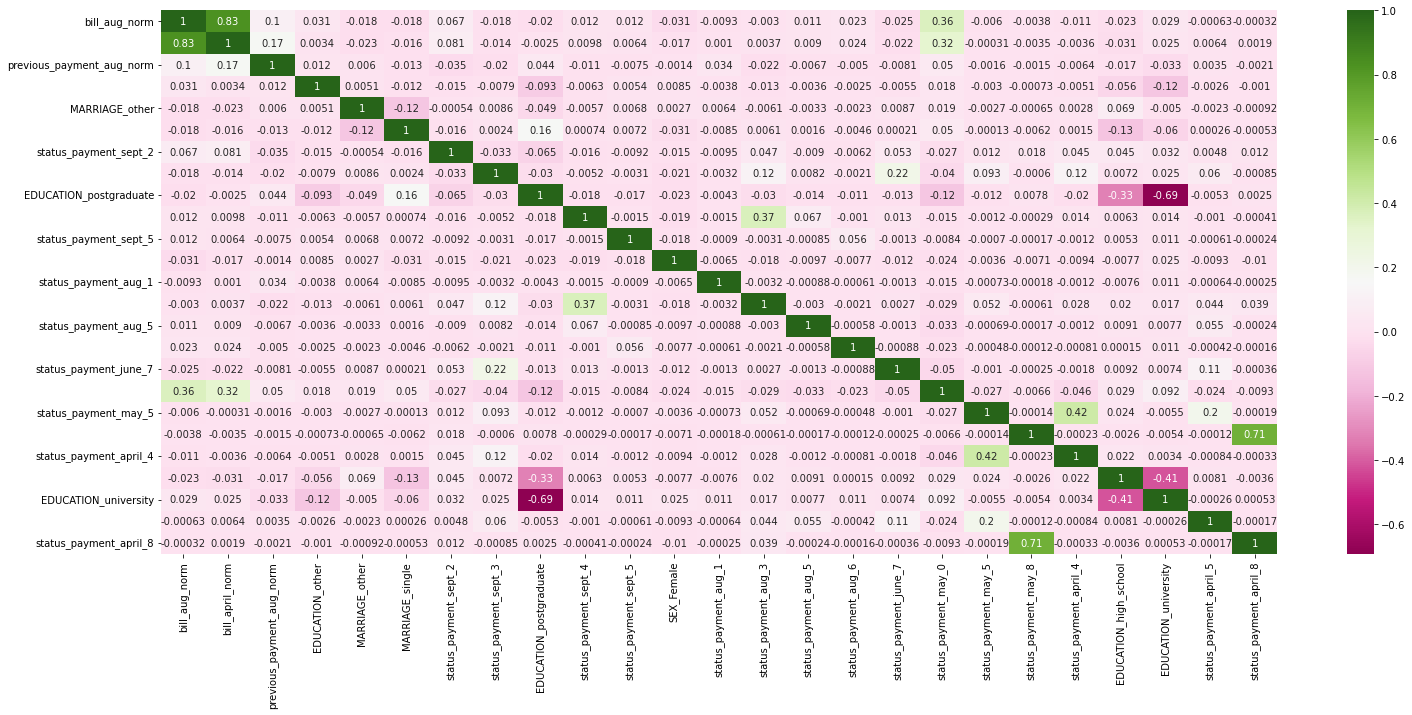

In [38]:
sns.heatmap(df_adjust[var_selected].corr(), annot = True, cmap = 'PiYG')
plt.gcf().set_size_inches(25,10)

In [39]:
df_adjust.fillna(0, inplace = True)

In [40]:
df_train = df_adjust
df_label = df_adjust['target']
x = df_adjust[var_selected].copy()
y = df_adjust['target']
x.shape, y.shape

((30000, 25), (30000,))

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df_train, df_label, test_size=0.3, random_state=42, stratify=df_label)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.14, random_state=42, stratify=y_train)

In [42]:
x_train.shape[0]/x.shape[0], x_test.shape[0]/x.shape[0]#, x_val.shape[0]/x.shape[0]

(0.7, 0.3)

**3.1 Target variable correction**

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

x_train_sm, y_train_sm = sm.fit_resample(x_train[var_selected], y_train.ravel())
x_train_sm.shape, y_train_sm.shape

print('After OverSampling, the shape of train_X: {}'.format(x_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

sum(y_train_sm==1)/x_train_sm.shape[0], sum(y_train_sm==0)/x_train_sm.shape[0]

After OverSampling, the shape of train_X: (32710, 25)
After OverSampling, the shape of train_y: (32710,) 

After OverSampling, counts of label '1': 16355
After OverSampling, counts of label '0': 16355


(0.5, 0.5)

**3.2 Best parameters**

In [ ]:
models_and_parameters = {
    'logistic': {'model': LogisticRegression(), 'params': {'penalty': ['l2', 'l1', None], 'class_weight': [None, 'balanced'],
                    'C': [0.01, 0.1, 1, 10],
                    'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                    'max_iter':  [20, 50, 100, 150] }},
    
   
    'rf': {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 15],
                               'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 3, 4, 5]}},
    
    
    'svm': {'model': SVC(), 'params': {'C': [0.1, 0.2, 0.5, 1, 10], 'kernel': ["linear", "polynomial", "radial"],
                               'degree': [2, 3, 4], 'gamma': [0.1, 0.2, 0.5, 1, 10]}},
    
}

for model_name, model_params in models_and_parameters.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5)
    grid_search.fit(x_train_sm, y_train_sm)
    best_model = grid_search.best_estimator_
    
warnings.filterwarnings('ignore')   

In [44]:
random_state = 42 

best_models = {
    'RF': RandomForestClassifier(random_state=random_state, n_estimators=100, max_depth=10),
    'SVM': SVC(random_state=random_state, C=1.0, kernel='rbf', probability=True),
    'Logistic': LogisticRegression(random_state=random_state, C=1.0, solver='liblinear', class_weight = 'balanced'),
}

results = {}
for name, model in best_models.items():
    model.fit(x_train[var_selected], y_train)  
    
    # calculates the metrics on the training set
    y_train_pred = model.predict(x_train[var_selected])
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    # calculates the metrics on the test
    y_test_pred = model.predict(x_test[var_selected])
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    # calculates the metrics on the training val
    #y_val_pred = model.predict(x_val[var_selected])
    #accuracy_val = accuracy_score(y_val, y_val_pred)
    #precision_val = precision_score(y_val, y_val_pred)
    #recall_val = recall_score(y_val, y_val_pred)
    #f1_val = f1_score(y_val, y_val_pred)  

    # Calculates the ROC curve and KS on the training set
    y_prob_train = model.predict_proba(x_train[var_selected])[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
    ks_train = max(tpr_train - fpr_train)
    
    # Calculates model output probabilities on the test set
    y_prob_test = model.predict_proba(x_test[var_selected])[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
    ks_test = max(tpr_test - fpr_test)
    
    # Calculates model output probabilities on the validation set
    #y_prob_val = model.predict_proba(x_val[var_selected])[:, 1]
    #fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_prob_val)
    #ks_val = max(tpr_val - fpr_val)

    results[name] = {
        "Train Accuracy": accuracy_train,
        "Train Precision": precision_train,
        "Train Recall": recall_train,
        "Train F1-Score": f1_train,
        "Train KS": ks_train,
        "Test Accuracy": accuracy_test,
        "Test Precision": precision_test,
        "Test Recall": recall_test,
        "Test F1-Score": f1_test,
        "Test KS": ks_test,
        #"Val Accuracy": accuracy_val,
        #"Val Precision": precision_val,
        #"Val Recall": recall_val,
        #"Val F1-Score": f1_val,
        #"Val KS": ks_val
    }

In [45]:
from tabulate import tabulate

# Organizes results into a dictionary
results_dict = {
    "Model": [],
    "Train Accuracy": [],
    "Train Precision": [],
    "Train Recall": [],
    "Train F1-Score": [],
    "Train KS": [],
    "Test Accuracy": [],
    "Test Precision": [],
    "Test Recall": [],
    "Test F1-Score": [],
    "Test KS": [],
    #"Val Accuracy": [],
    #"Val Precision": [],
    #"Val Recall": [],
    #"Val F1-Score": [],
    #"Val KS": []
}

for model_name, metrics in results.items():
    results_dict["Model"].append(model_name)
    results_dict["Train Accuracy"].append(f'{metrics["Train Accuracy"]:.3f}')
    results_dict["Train Precision"].append(f'{metrics["Train Precision"]:.3f}')
    results_dict["Train Recall"].append(f'{metrics["Train Recall"]:.3f}')
    results_dict["Train F1-Score"].append(f'{metrics["Train F1-Score"]:.3f}')
    results_dict["Train KS"].append(f'{metrics["Train KS"]:.3f}')
    results_dict["Test Accuracy"].append(f'{metrics["Test Accuracy"]:.3f}')
    results_dict["Test Precision"].append(f'{metrics["Test Precision"]:.3f}')
    results_dict["Test Recall"].append(f'{metrics["Test Recall"]:.3f}')
    results_dict["Test F1-Score"].append(f'{metrics["Test F1-Score"]:.3f}')
    results_dict["Test KS"].append(f'{metrics["Test KS"]:.3f}')
    #results_dict["Val Accuracy"].append(f'{metrics["Val Accuracy"]:.3f}')
    #results_dict["Val Precision"].append(f'{metrics["Val Precision"]:.3f}')
    #results_dict["Val Recall"].append(f'{metrics["Val Recall"]:.3f}')
    #results_dict["Val F1-Score"].append(f'{metrics["Val F1-Score"]:.3f}')
    #results_dict["Val KS"].append(f'{metrics["Val KS"]:.3f}')

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results_dict)

print(results_df)

      Model Train Accuracy Train Precision Train Recall Train F1-Score  \
0        RF          0.833           0.782        0.342          0.476   
1       SVM          0.822           0.709        0.334          0.454   
2  Logistic          0.781           0.505        0.434          0.466   

  Train KS Test Accuracy Test Precision Test Recall Test F1-Score Test KS  
0    0.413         0.817          0.694       0.311         0.430   0.345  
1    0.331         0.817          0.689       0.319         0.436   0.291  
2    0.316         0.779          0.500       0.430         0.462   0.323  


In [46]:
data = confusion_matrix(y_train, y_train_pred)
df_matriz = pd.DataFrame(data, columns=np.unique(df_adjust['target']), index = np.unique(df_adjust['target']))
df_matriz.index.name = 'Real'
df_matriz.columns.name = 'Predito'
df_matriz

Predito,0,1
Real,,
0,14378,1977
1,2631,2014


**3.4 Ordering of the chosen model**

**Treino**

In [47]:
def ordenacao_qcuttabela(prob, y_target, particoes):
    prob_train = pd.qcut(prob, q=particoes, labels=False)
    scores_train = pd.DataFrame([list(prob_train), list(y_target)]).T
    scores_train.columns = ["rating", "ones"]
    scores_train["rating"] = scores_train["rating"] + 1
    scores_train["grupo"] = pd.qcut(prob, particoes, precision=0)  # +

    score_train = scores_train.groupby(["rating", "grupo"]).agg(
        qtd=("ones", "count"),
        ones=("ones", lambda x: x.eq(1).sum()),
        percentual_ones=("ones", "mean"),
    )

    score_train.reset_index(inplace=True)
    return score_train.dropna().reset_index(drop=True)


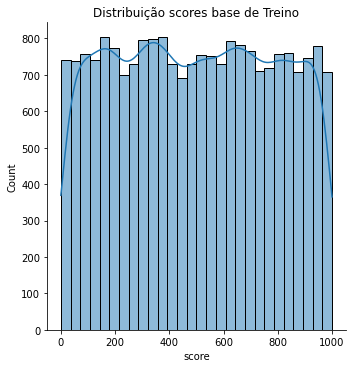

In [48]:
from sklearn.preprocessing import QuantileTransformer

prob_train = best_models['RF'].predict_proba(x_train[var_selected])[:,1]

qt = QuantileTransformer(random_state=42)

score_train = np.round((1-qt.fit_transform(prob_train.reshape((-1, 1)))) * 1000)
x_train["score"] = score_train

sns.displot(x="score", data=x_train, kde=True)
plt.title(f"Distribuição scores base de Treino")
plt.show()


In [49]:
ordem_train = ordenacao_qcuttabela(score_train.reshape((-1,)), y_train.values, 10)
ordem_train

,rating,grupo,qtd,ones,percentual_ones
0,1,"(-1.0, 100.0]",2101,1600.0,0.761542
1,2,"(100.0, 199.0]",2215,785.0,0.354402
2,3,"(199.0, 301.0]",1984,494.0,0.248992
3,4,"(301.0, 393.0]",2101,438.0,0.208472
4,5,"(393.0, 498.0]",2107,353.0,0.167537
5,6,"(498.0, 599.0]",2100,302.0,0.143810
6,7,"(599.0, 696.0]",2112,296.0,0.140152
7,8,"(696.0, 796.0]",2090,192.0,0.091866
8,9,"(796.0, 899.0]",2098,125.0,0.059581
9,10,"(899.0, 1000.0]",2092,60.0,0.028681


In [50]:
# intervalos de score
intervals = list(ordem_train.grupo.unique().astype(str))

# Extrair intervalos
intervals_list = []

for i in range(len(intervals)):
    str_aux = intervals[i].replace("'", "").replace("]", ")")
    y_aux = tuple(float(s) for s in str_aux.strip("()").split(","))
    if i == 0:
        y_aux = tuple([-1.0, y_aux[1]])
    if i == (len(intervals) - 1):
        y_aux = tuple([y_aux[0], 1001.0])
    intervals_list.append(y_aux)
    
intervals_list

[(-1.0, 100.0),
 (100.0, 199.0),
 (199.0, 301.0),
 (301.0, 393.0),
 (393.0, 498.0),
 (498.0, 599.0),
 (599.0, 696.0),
 (696.0, 796.0),
 (796.0, 899.0),
 (899.0, 1001.0)]

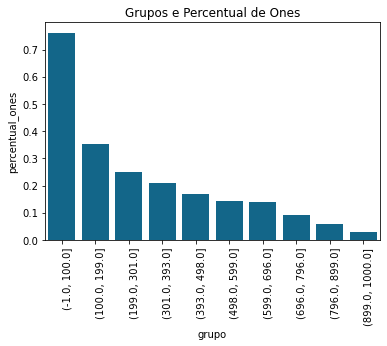

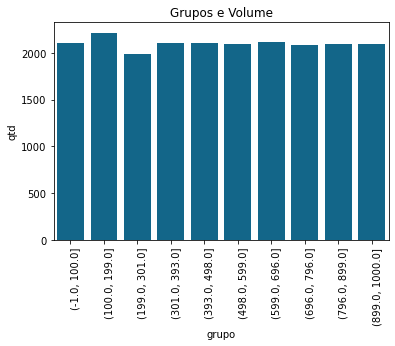

In [51]:
plt.rcParams.update({"font.size": 10})
sns.barplot(x="grupo", y="percentual_ones", data=ordem_train, color="#006e9cff")
plt.title(f"Grupos e Percentual de Ones")
plt.xticks(rotation='vertical', ha="right", rotation_mode="anchor")
plt.show()

sns.barplot(x="grupo", y="qtd", data=ordem_train, color="#006e9cff")
plt.title(f"Grupos e Volume")
plt.xticks(rotation='vertical', ha="right", rotation_mode="anchor")
plt.show()

**Teste**

In [52]:
def ordenacao_qcuttabela(prob, y_target, particoes):
    prob_test = pd.qcut(prob, q=particoes, labels=False)
    scores_test = pd.DataFrame([list(prob_test), list(y_target)]).T
    scores_test.columns = ["rating", "ones"]
    scores_test["rating"] = scores_test["rating"] + 1
    scores_test["grupo"] = pd.qcut(prob, particoes, precision=0)  # +

    score_test = scores_test.groupby(["rating", "grupo"]).agg(
        qtd=("ones", "count"),
        ones=("ones", lambda x: x.eq(1).sum()),
        percentual_ones=("ones", "mean"),
    )

    score_test.reset_index(inplace=True)
    return score_test.dropna().reset_index(drop=True)


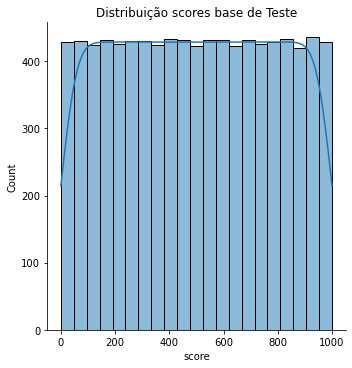

In [53]:
from sklearn.preprocessing import QuantileTransformer

prob_test = best_models['RF'].predict_proba(x_test[var_selected])[:,1]

qt = QuantileTransformer(random_state=42)

score_test = np.round((1-qt.fit_transform(prob_test.reshape((-1, 1)))) * 1000)
x_test["score"] = score_test

sns.displot(x="score", data=x_test, kde=True)
plt.title(f"Distribuição scores base de Teste")
plt.show()

In [54]:
ordem_test = ordenacao_qcuttabela(score_test.reshape((-1,)), y_test.values, 10)
ordem_test

,rating,grupo,qtd,ones,percentual_ones
0,1,"(-1.0, 100.0]",905,628.0,0.693923
1,2,"(100.0, 203.0]",948,306.0,0.322785
2,3,"(203.0, 300.0]",855,193.0,0.225731
3,4,"(300.0, 400.0]",897,186.0,0.207358
4,5,"(400.0, 500.0]",900,160.0,0.177778
5,6,"(500.0, 600.0]",900,149.0,0.165556
6,7,"(600.0, 700.0]",899,119.0,0.132369
7,8,"(700.0, 800.0]",897,90.0,0.100334
8,9,"(800.0, 900.0]",902,95.0,0.105322
9,10,"(900.0, 1000.0]",897,65.0,0.072464


In [55]:
# intervalos de score
intervals = list(ordem_test.grupo.unique().astype(str))

# Extrair intervalos
intervals_list = []

for i in range(len(intervals)):
    str_aux = intervals[i].replace("'", "").replace("]", ")")
    y_aux = tuple(float(s) for s in str_aux.strip("()").split(","))
    if i == 0:
        y_aux = tuple([-1.0, y_aux[1]])
    if i == (len(intervals) - 1):
        y_aux = tuple([y_aux[0], 1001.0])
    intervals_list.append(y_aux)
    
intervals_list

[(-1.0, 100.0),
 (100.0, 203.0),
 (203.0, 300.0),
 (300.0, 400.0),
 (400.0, 500.0),
 (500.0, 600.0),
 (600.0, 700.0),
 (700.0, 800.0),
 (800.0, 900.0),
 (900.0, 1001.0)]

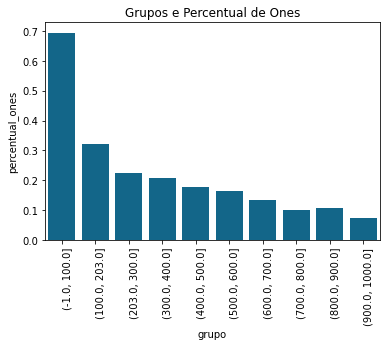

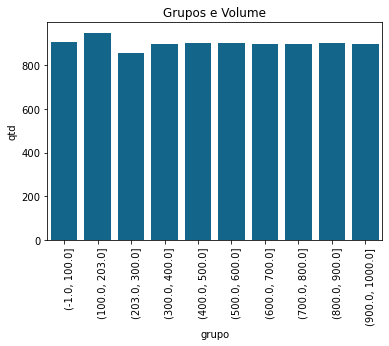

In [56]:
plt.rcParams.update({"font.size": 10})
sns.barplot(x="grupo", y="percentual_ones", data=ordem_test, color="#006e9cff")
plt.title(f"Grupos e Percentual de Ones")
plt.xticks(rotation='vertical', ha="right", rotation_mode="anchor")
plt.show()

sns.barplot(x="grupo", y="qtd", data=ordem_test, color="#006e9cff")
plt.title(f"Grupos e Volume")
plt.xticks(rotation='vertical', ha="right", rotation_mode="anchor")
plt.show()

<AxesSubplot:ylabel='Feature'>

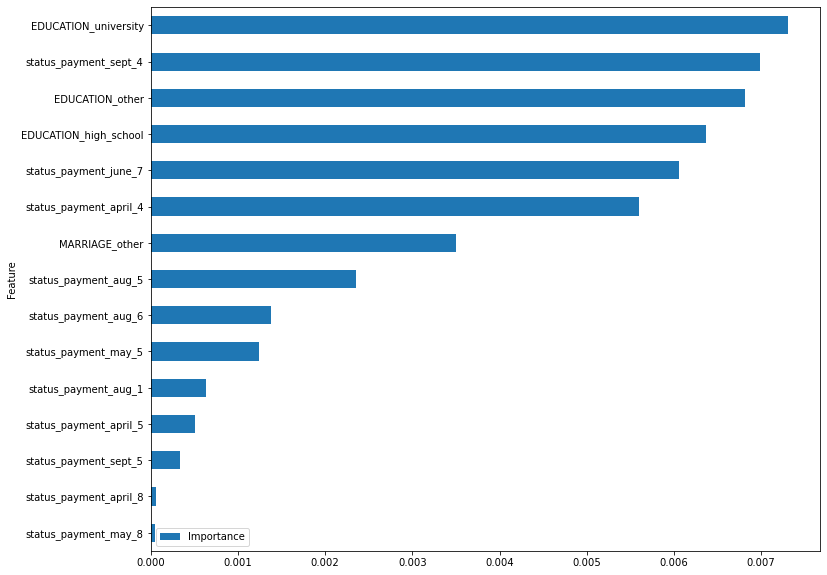

In [57]:
feature_importance = pd.DataFrame({'Feature': x[var_selected].columns, 'Importance': np.abs(best_models['RF'].feature_importances_)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance[0:15].plot(x='Feature', y='Importance', kind='barh', figsize=(12, 10))

**3.5 Export**

In [60]:
def return_rating(df, score_label, intervals_list):
    resultado = pd.DataFrame({"Score": df[score_label]})
    bins = pd.IntervalIndex.from_tuples(intervals_list)
    faixa = pd.cut(resultado.Score, bins=bins, retbins=True)
    resultado["Cluster"] = faixa[0]
    resultado["Intervalo"] = resultado["Cluster"]
    names = list(range(1, len(intervals_list) + 1))
    replace = {}
    for i in range(0, len(intervals_list)):
        replace[
            "("
            + str(float(intervals_list[i][0]))
            + ", "
            + str(float(intervals_list[i][1]))
            + "]"
        ] = names[i]

    return resultado.Cluster.astype(str).replace(replace)


In [61]:
x_train['prob_modelo'] = best_models['RF'].predict_proba(x_train[var_selected])[:,0]
x_train['predict_modelo'] = best_models['RF'].predict(x_train[var_selected])
x_train['base'] = 'treino'
x_train['target'] = y_train
x_train["rating"] = return_rating(x_train, "score", intervals_list)

x_test['prob_modelo'] = best_models['RF'].predict_proba(x_test[var_selected])[:,0]
x_test['predict_modelo'] = best_models['RF'].predict(x_test[var_selected])
x_test['base'] = 'teste'
x_test['target'] = y_test
x_test["rating"] = return_rating(x_test, "score", intervals_list)


In [62]:
x_train

,ID,LIMIT_BAL,AGE,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,previous_payment_sept,...,status_payment_april_4,status_payment_april_5,status_payment_april_6,status_payment_april_7,status_payment_april_8,score,prob_modelo,predict_modelo,base,rating
11018,11019,160000.0,32,156098.0,156259.0,155404.0,153234.0,156731.0,155818.0,6000.0,...,0,0,0,0,0,908.0,0.897280,0,treino,10
1710,1711,100000.0,30,28383.0,32903.0,42283.0,51539.0,50583.0,52588.0,5000.0,...,0,0,0,0,0,506.0,0.827723,0,treino,6
4618,4619,80000.0,29,73722.0,75323.0,64277.0,45455.0,42231.0,42804.0,3300.0,...,0,0,0,0,0,914.0,0.898344,0,treino,10
5482,5483,20000.0,27,7286.0,2160.0,780.0,0.0,0.0,0.0,1006.0,...,0,0,0,0,0,386.0,0.804849,0,treino,4
26187,26188,50000.0,30,0.0,2070.0,0.0,0.0,0.0,0.0,2070.0,...,0,0,0,0,0,284.0,0.777510,0,treino,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25780,25781,200000.0,32,10701.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,242.0,0.767497,0,treino,3
13921,13922,120000.0,24,112336.0,113351.0,115515.0,113948.0,122127.0,121962.0,4200.0,...,0,0,0,0,0,875.0,0.892359,0,treino,9
3794,3795,120000.0,24,75796.0,76004.0,67187.0,49924.0,33188.0,19826.0,3700.0,...,0,0,0,0,0,856.0,0.889709,0,treino,9
27565,27566,360000.0,57,0.0,0.0,860.0,246.0,-46.0,-46.0,0.0,...,0,0,0,0,0,305.0,0.782023,0,treino,4


In [63]:
df_adjust.head()

,ID,LIMIT_BAL,AGE,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,previous_payment_sept,...,status_payment_april_-2,status_payment_april_-1,status_payment_april_0,status_payment_april_2,status_payment_april_3,status_payment_april_4,status_payment_april_5,status_payment_april_6,status_payment_april_7,status_payment_april_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
df_final = pd.concat([x_train, x_test])
df_final.head()

,ID,LIMIT_BAL,AGE,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,previous_payment_sept,...,status_payment_april_4,status_payment_april_5,status_payment_april_6,status_payment_april_7,status_payment_april_8,score,prob_modelo,predict_modelo,base,rating
11018,11019,160000.0,32,156098.0,156259.0,155404.0,153234.0,156731.0,155818.0,6000.0,...,0,0,0,0,0,908.0,0.897280,0,treino,10
1710,1711,100000.0,30,28383.0,32903.0,42283.0,51539.0,50583.0,52588.0,5000.0,...,0,0,0,0,0,506.0,0.827723,0,treino,6
4618,4619,80000.0,29,73722.0,75323.0,64277.0,45455.0,42231.0,42804.0,3300.0,...,0,0,0,0,0,914.0,0.898344,0,treino,10
5482,5483,20000.0,27,7286.0,2160.0,780.0,0.0,0.0,0.0,1006.0,...,0,0,0,0,0,386.0,0.804849,0,treino,4
26187,26188,50000.0,30,0.0,2070.0,0.0,0.0,0.0,0.0,2070.0,...,0,0,0,0,0,284.0,0.777510,0,treino,3


In [67]:
df_final.to_csv(r"C:\Users\LUANATHAMIRISDASILVA\Downloads\case\base_modelo_final_case_neon.csv", index=False)

**3.6 Shap**

In [69]:
import shap
# Calcular os valores SHAP
rf_shap = shap.Explainer(best_models['RF'].predict, x_train[var_selected])
shap_values = rf_shap(x_test[var_selected])
# Cria e exibe um dataframe com os shap_values
# Get SHAP values for the first prediction
shap_values_single = shap_values[0]
# Create a DataFrame with feature names and SHAP values
df_shap = pd.DataFrame(list(zip(x_test[var_selected].columns, shap_values_single.values)), columns=['feature', 'shap_value'])
 # Sort by absolute SHAP value

df_shap['abs_shap_value'] = df_shap['shap_value'].abs()

df_shap = df_shap.sort_values('abs_shap_value', ascending=False).drop('abs_shap_value', axis=1)

df_shap

Permutation explainer: 9001it [1:00:46,  2.46it/s]                          


,feature,shap_value
6,status_payment_sept_2,-0.094722
7,status_payment_sept_3,-0.008611
0,bill_aug_norm,0.005556
8,EDUCATION_postgraduate,-0.002500
22,EDUCATION_university,-0.001667
2,previous_payment_aug_norm,0.000833
17,status_payment_may_0,0.000556
11,SEX_Female,0.000556
1,bill_april_norm,0.000278
5,MARRIAGE_single,-0.000278


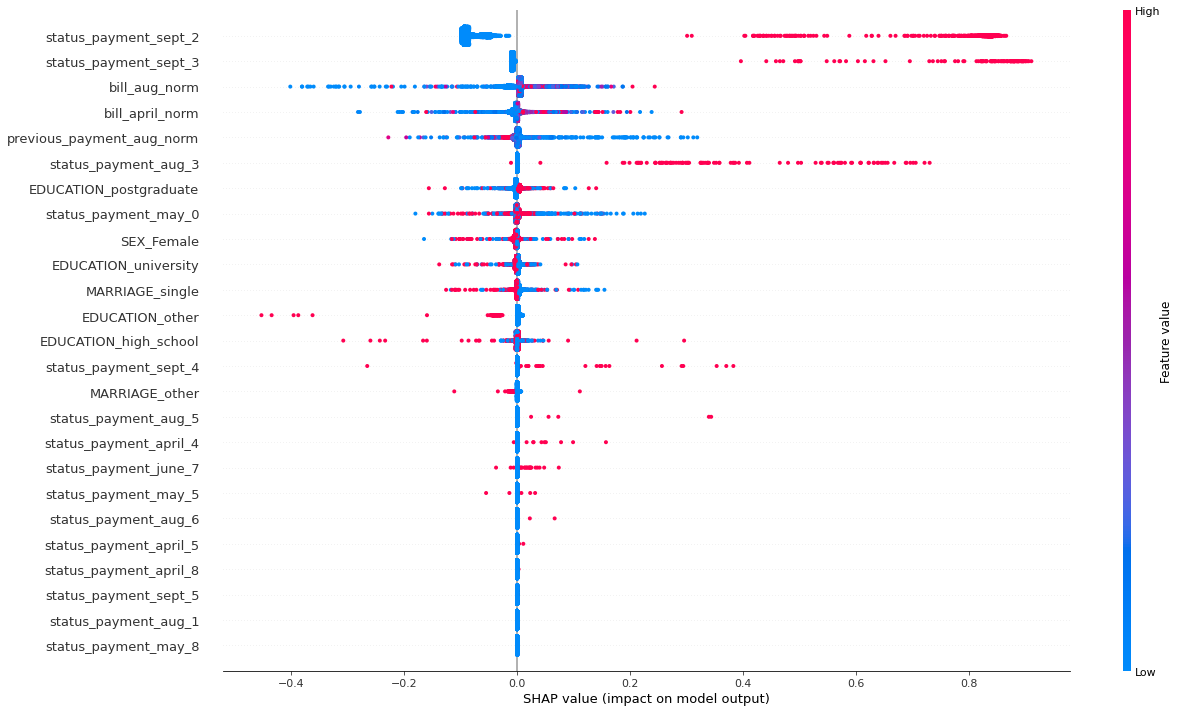

In [70]:
shap.summary_plot(shap_values, x_test[var_selected], feature_names=x_test[var_selected].columns, plot_size=(18,10), plot_type="dot", max_display=100)